<a href="https://colab.research.google.com/github/Snehaannazac/colab-git-demo-sanna/blob/main/Assignment_9_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Dataset Selection and Preprocessing:


In [1]:
from google.colab import files
uploaded = files.upload()


Saving Reviews.csv to Reviews.csv


In [2]:
import pandas as pd
df = pd.read_csv('Reviews.csv')
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


2.Clustering

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Drop missing values from relevant columns
df_clean = df.dropna(subset=['Text'])

# 2. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=1000, stop_words='english')
X_tfidf = tfidf.fit_transform(df_clean['Text'])

# Convert to dense array
X_dense = X_tfidf.toarray()

# 3. Optional Scaling (not required for TF-IDF, but okay for clustering)
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_dense)

# Now ready for clustering and dimensionality reduction
print("TF-IDF shape:", X_scaled.shape)


TF-IDF shape: (133, 1000)


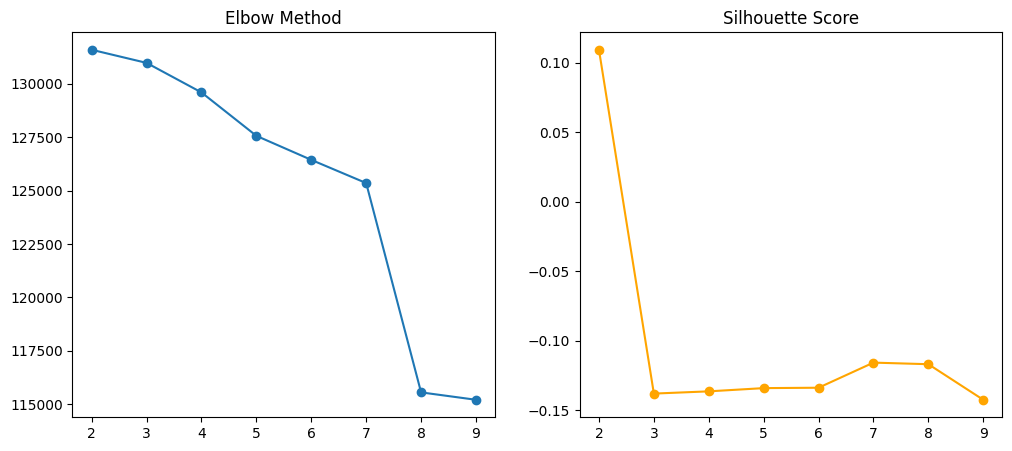

In [4]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Elbow + Silhouette
sse = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, km.labels_))

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(k_range, sse, marker='o'); plt.title("Elbow Method")
plt.subplot(1,2,2); plt.plot(k_range, silhouette_scores, marker='o', color='orange'); plt.title("Silhouette Score")
plt.show()


3.Dimensionality Reduction

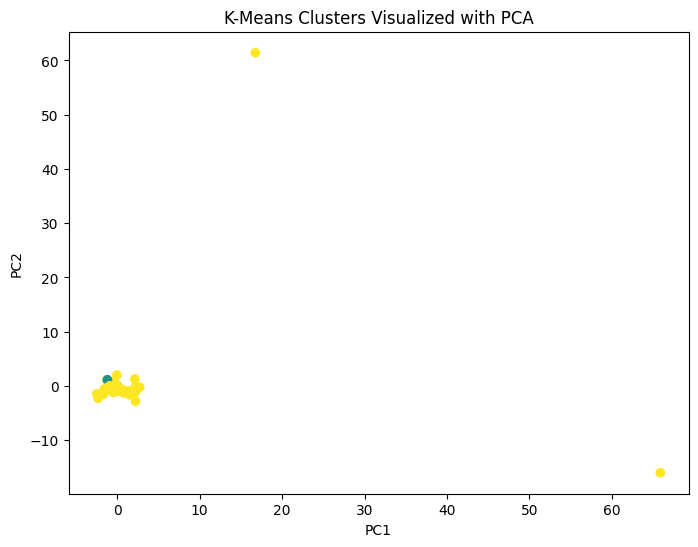

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Cluster with optimal k
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plot PCA visualization
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
plt.title("K-Means Clusters Visualized with PCA")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


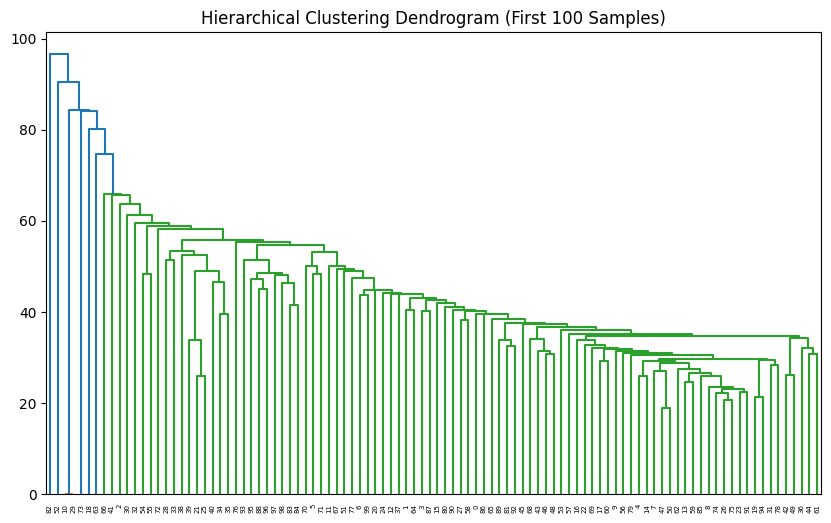

In [6]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled[:100], 'ward')  # use only subset to speed up
plt.figure(figsize=(10, 6))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram (First 100 Samples)")
plt.show()


4.Model Evaluation

In [7]:
# Use silhouette score already calculated
print("Best Silhouette Score (K-Means):", max(silhouette_scores))


Best Silhouette Score (K-Means): 0.10932202559435508


5.Deployment and Monitoring:


- **Challenges**:
  - *Latency*: Real-time clustering might lag on large datasets.
  - *Scalability*: TF-IDF and clustering on millions of reviews is resource-intensive.
  - *Maintenance*: Model drift as new product categories emerge.

- **Monitoring Strategy**:
  - Monitor average silhouette score over time.
  - Schedule re-training monthly with new data.
  - Add alerts for feature drift or data schema change.
